In [1]:
#Read dataset
!dir

 Volume in drive C has no label.
 Volume Serial Number is 7E25-74C2

 Directory of C:\Users\divyakamat\python_code\notebooks

07-01-2019  17:38    <DIR>          .
07-01-2019  17:38    <DIR>          ..
07-01-2019  17:38    <DIR>          .ipynb_checkpoints
07-01-2019  17:33               581 BlackFriday - EDA.ipynb
07-01-2019  16:02           186,610 Iris Dataset - EDA Analysis.ipynb
               2 File(s)        187,191 bytes
               3 Dir(s)  100,802,523,136 bytes free


In [3]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
black_friday = pd.read_csv("../../data/DataSets/black-friday/BlackFriday.csv")

In [5]:
black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [30]:
#Convert all columns to lower case

black_friday.columns = map(str.lower,black_friday.columns)

In [31]:
#Select all columns
print("All, columns {}:",black_friday.columns)

#Select only categorical columns
print("\nOnly categorical columns {}:",black_friday.select_dtypes(include=[np.object]).columns)

#Select only numeric columns
print("\nOnly numeric columns {}:",black_friday.select_dtypes(exclude=[np.object]).columns)


All, columns {}: Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

Only categorical columns {}: Index(['product_id', 'gender', 'age', 'city_category',
       'stay_in_current_city_years'],
      dtype='object')

Only numeric columns {}: Index(['user_id', 'occupation', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')


In [32]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [33]:
#Display Statistical metrics

black_friday.describe()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [34]:
#Check for null values

black_friday.isnull().any()

user_id                       False
product_id                    False
gender                        False
age                           False
occupation                    False
city_category                 False
stay_in_current_city_years    False
marital_status                False
product_category_1            False
product_category_2             True
product_category_3             True
purchase                      False
dtype: bool

In [39]:
#Check for unique values for Product category 2 and Product category 3

print('Product_Category_2 -', black_friday['product_category_2'].unique())
print('Product_Category_3 -', black_friday['product_category_3'].unique())

Product_Category_2 - [ nan   6.  14.   2.   8.  15.  16.  11.   5.   3.   4.  12.   9.  10.  17.
  13.   7.  18.]
Product_Category_3 - [ nan  14.  17.   5.   4.  16.  15.   8.   9.  13.   6.  12.   3.  18.  11.
  10.]


In [40]:
#Fill the null values as zero
black_friday.fillna(value=0,inplace=True)

In [41]:
black_friday.isnull().any()

user_id                       False
product_id                    False
gender                        False
age                           False
occupation                    False
city_category                 False
stay_in_current_city_years    False
marital_status                False
product_category_1            False
product_category_2            False
product_category_3            False
purchase                      False
dtype: bool

In [48]:
#Drop fields
black_friday.drop('user_id',inplace=True,axis=1)

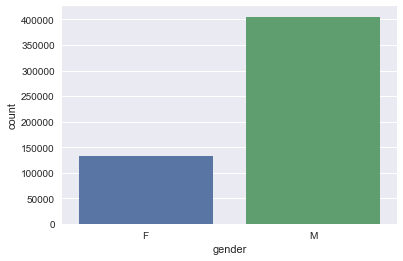

In [49]:
sns.countplot(black_friday["gender"])

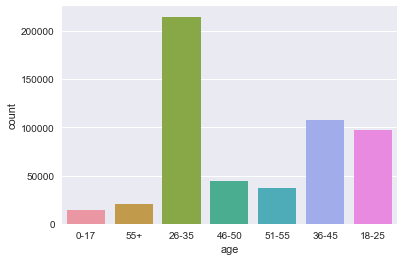

In [51]:
sns.countplot(black_friday["age"])

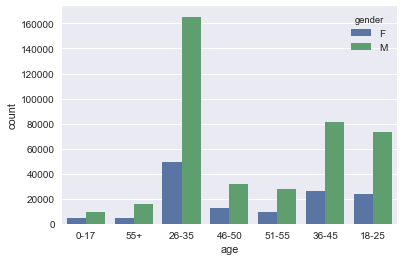

In [52]:
sns.countplot(black_friday["age"],hue=black_friday["gender"])